In [5]:
!pip install kagglehub
!pip install opencv-python

In [6]:
import kagglehub
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import random


In [7]:
dataset = kagglehub.dataset_download('ashishsaxena2209/animal-image-datasetdog-cat-and-panda')
print(os.listdir(dataset))

['animals', 'images']


In [8]:
dataset = os.path.join(dataset, "animals")
print(os.listdir(dataset))

['animals', 'cats', 'dogs', 'images', 'panda']


In [9]:
dataset = os.path.join(dataset, "animals")
print(os.listdir(dataset))

['cats', 'dogs', 'panda']


In [10]:
categories = os.listdir(dataset)
print(categories)

['cats', 'dogs', 'panda']


In [11]:
print ([os.listdir(os.path.join(dataset, category)) for category in categories])

[['cats_00001.jpg', 'cats_00002.jpg', 'cats_00003.jpg', 'cats_00004.jpg', 'cats_00005.jpg', 'cats_00006.jpg', 'cats_00007.jpg', 'cats_00008.jpg', 'cats_00009.jpg', 'cats_00010.jpg', 'cats_00011.jpg', 'cats_00012.jpg', 'cats_00013.jpg', 'cats_00014.jpg', 'cats_00015.jpg', 'cats_00016.jpg', 'cats_00017.jpg', 'cats_00018.jpg', 'cats_00019.jpg', 'cats_00020.jpg', 'cats_00021.jpg', 'cats_00022.jpg', 'cats_00023.jpg', 'cats_00024.jpg', 'cats_00025.jpg', 'cats_00026.jpg', 'cats_00027.jpg', 'cats_00028.jpg', 'cats_00029.jpg', 'cats_00030.jpg', 'cats_00031.jpg', 'cats_00032.jpg', 'cats_00033.jpg', 'cats_00034.jpg', 'cats_00035.jpg', 'cats_00036.jpg', 'cats_00037.jpg', 'cats_00038.jpg', 'cats_00039.jpg', 'cats_00040.jpg', 'cats_00041.jpg', 'cats_00042.jpg', 'cats_00043.jpg', 'cats_00044.jpg', 'cats_00045.jpg', 'cats_00046.jpg', 'cats_00047.jpg', 'cats_00048.jpg', 'cats_00049.jpg', 'cats_00050.jpg', 'cats_00051.jpg', 'cats_00052.jpg', 'cats_00053.jpg', 'cats_00054.jpg', 'cats_00055.jpg', 'cats_00

In [12]:
train_data = [] #A list for store processed img


for index, category in enumerate(categories):
    label = index
    path = os.path.join(dataset, category)
    images = os.listdir(path)
    random.shuffle(images)


    for img in images[:100]:
        img_path = os.path.join(path, img)
        img_bgr = cv2.imread(img_path)
        img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
        img_gray = cv2.resize(img_gray, (100, 100))
        train_data.append([img_gray, label])

The program handles training data by organizing images from different categories like 'cats', 'dogs', and 'pandas'. It starts by creating an empty list called train_data to store both the processed images and their labels. For each category, it locates the folder path, collects all image filenames inside, and shuffles them to introduce randomness. From the shuffled list, it selects the first 100 images.
Each selected image is then read, converted to grayscale to remove color, and resized to 100x100 pixels. After processing, the image is paired with a label based on its category and added to the train_data list. As a result, a total of 300 images (100 from each category) are prepared for training the model.

In [13]:
np.random.shuffle(train_data)
print ([train_data[i][1] for i in range(10)])

[2, 1, 1, 0, 2, 1, 2, 2, 1, 0]


the code shuffles the `train_data` list

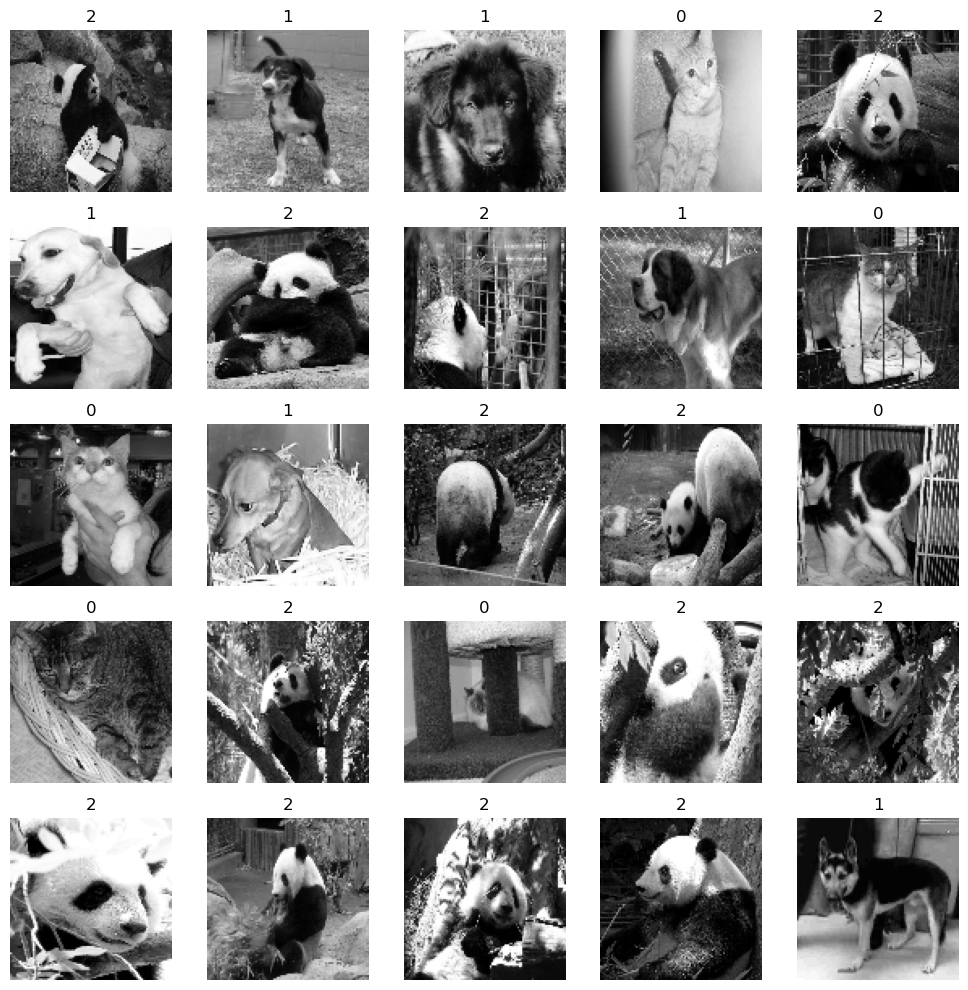

In [14]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
  if i < len(train_data):
    img_array, label = train_data[i]
    ax.imshow(img_array, cmap="gray")
    ax.set_title(label)
    ax.axis('off')

plt.tight_layout()
plt.show()

The program displays a set of images from the dataset along with their corresponding labels, which represent the animal type: dog, cat, or panda. It uses Matplotlib to create a grid layout where each image is shown in grayscale. The images appear in their original grayscale format, and each one is labeled with a number — 0 for dogs, 1 for cats, and 2 for pandas.
It loops through the train_data list and plots each image in the grid, using ax.set_title(label) to set the title of each image with its label. This way, we can easily see which label is linked to which image. This kind of visualization helps us better understand how the model might recognize and classify the different animals based on their grayscale features.

5 fold cross validation

In [16]:
folds = []
for i in range(5):
    folds.append(train_data[i::5])

len(folds)

5

In [18]:
for fold_index in range(len(folds)):
    fold = folds[fold_index]  # Get the current fold
    labels = [label for _, label in fold]  # Extract labels from the fold
    print(f"Fold {fold_index + 1}:")  # Print the current fold number
    print(f"Labels: {labels}")  # Print the labels of the current fold

Fold 1:
Labels: [2, 1, 0, 0, 2, 0, 0, 2, 1, 1, 2, 0, 2, 1, 1, 1, 2, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 2, 2, 1, 2, 0, 0, 2, 1, 0, 1, 2, 1, 2, 0, 2, 2, 2, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 2, 2]
Fold 2:
Labels: [1, 2, 1, 2, 2, 2, 0, 1, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 2, 1, 1, 1, 2, 0, 1, 2, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 0, 0, 0, 1, 1, 2, 1, 1, 2, 0, 1, 0, 1, 2, 0, 2, 0, 1, 0, 0]
Fold 3:
Labels: [1, 2, 2, 0, 2, 2, 2, 1, 0, 2, 1, 0, 0, 0, 2, 0, 2, 1, 1, 1, 1, 0, 2, 2, 0, 1, 0, 2, 1, 2, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 2, 1, 2, 0, 0, 1, 1, 1, 1, 2, 0, 1, 0, 1, 2, 2, 0, 0]
Fold 4:
Labels: [0, 1, 2, 2, 2, 0, 1, 2, 2, 2, 0, 1, 0, 2, 2, 1, 1, 2, 0, 1, 1, 0, 0, 2, 2, 2, 0, 0, 2, 1, 1, 0, 2, 1, 0, 1, 2, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 1, 2, 2, 1, 0, 1, 2, 2, 1, 0, 0, 0, 2]
Fold 5:
Labels: [2, 0, 0, 2, 1, 2, 2, 1, 2, 0, 0, 1, 0, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 2, 2, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0]


In [19]:
def l2_distance(valid_img, train_img):
    difference = valid_img - train_img  # Calculate element-wise difference
    squared_difference = np.square(difference)  # Square the differences
    summed_squares = np.sum(squared_difference)  # Sum all squared differences
    distance = np.sqrt(summed_squares)  # Take the square root to get Euclidean distance
    return distance

def l1_distance(valid_img, train_img):
    difference = np.abs(valid_img - train_img)  # Calculate element-wise absolute difference
    distance = np.sum(difference)  # Sum all absolute differences to get Manhattan distance
    return distance


In [25]:
from collections import Counter  # Importing the Counter class to count the occurrences of labels

def knn_prediction(distances, k=1):
    # Get the k nearest neighbors based on the provided distances
    nearest_neighbors = distances[:k]

    # Extract the labels of the nearest neighbors
    labels = [label for _, label in nearest_neighbors]

    # Count the occurrences of each label using Counter
    label_counts = Counter(labels)

    # Get the most common label (the one that appears most frequently among the nearest neighbors)
    most_common_label = label_counts.most_common(1)[0][0]

    # Return the most common label as the predicted label
    return most_common_label


In [26]:
fold_accuracies_2 = []  # List to store accuracies for each fold and each value of k
avg_accuracies_2 = []  # List to store average accuracy for each value of k

# Loop through different values of k (1 to 30 for k-NN)
for k in range(1, 41):
    accuracies = []  # List to store accuracy for each fold for a particular value of k

    # Loop over each fold for cross-validation (leave-one-out fold)
    for i in range(len(folds) - 1, -1, -1):
        valid_set = folds[i]  # Select the validation set (current fold)

        # Create the training set by combining all folds except the current validation fold
        train_set = [
            item for j, fold in enumerate(folds) if j != i for item in fold
        ]

        predictions = []  # List to store the prediction results for the current fold

        # Loop through each image in the validation set
        for valid_img in valid_set:
            # Calculate L2 distances between the validation image and all training images
            l2_distances = [
                (l2_distance(valid_img[0], train_img[0]), train_img[1])
                for train_img in train_set
            ]
            l2_distances.sort()  # Sort the distances in ascending order

            # Use the k-NN prediction function to get the predicted label for the validation image
            predicted_label = knn_prediction(l2_distances, k)
            # Check if the predicted label matches the true label of the validation image
            predictions.append(1 if predicted_label == valid_img[1] else 0)

        # Calculate the accuracy for this fold (percentage of correct predictions)
        fold_accuracy = sum(predictions) / len(predictions)
        accuracies.append(fold_accuracy)

    # Store the accuracies for all folds for the current value of k
    fold_accuracies_2.append(accuracies)
    # Calculate the average accuracy for the current value of k across all folds
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_accuracies_2.append(avg_accuracy)

    # Print the results for the current value of k
    print(f"\nK = {k}:")
    print(f"  Average Accuracy: {avg_accuracy:.2f}")
    print(f"  Fold Accuracies: {accuracies}")



K = 1:
  Average Accuracy: 0.43
  Fold Accuracies: [0.55, 0.38333333333333336, 0.4666666666666667, 0.2833333333333333, 0.48333333333333334]

K = 2:
  Average Accuracy: 0.43
  Fold Accuracies: [0.55, 0.38333333333333336, 0.4666666666666667, 0.2833333333333333, 0.48333333333333334]

K = 3:
  Average Accuracy: 0.45
  Fold Accuracies: [0.4666666666666667, 0.48333333333333334, 0.45, 0.35, 0.5]

K = 4:
  Average Accuracy: 0.45
  Fold Accuracies: [0.48333333333333334, 0.45, 0.4166666666666667, 0.36666666666666664, 0.5166666666666667]

K = 5:
  Average Accuracy: 0.45
  Fold Accuracies: [0.4666666666666667, 0.5, 0.38333333333333336, 0.43333333333333335, 0.48333333333333334]

K = 6:
  Average Accuracy: 0.47
  Fold Accuracies: [0.4666666666666667, 0.55, 0.38333333333333336, 0.45, 0.48333333333333334]

K = 7:
  Average Accuracy: 0.50
  Fold Accuracies: [0.48333333333333334, 0.5333333333333333, 0.45, 0.5, 0.5166666666666667]

K = 8:
  Average Accuracy: 0.46
  Fold Accuracies: [0.48333333333333334,

In [38]:
fold_accuracies_1 = []  # List to store accuracies for each fold and each value of k
avg_accuracies_1 = []  # List to store average accuracy for each value of k
# Loop through different values of k (1 to 30 for k-NN)
for k in range(1, 41):
    accuracies = []  # List to store accuracy for each fold for a particular value of k

    # Loop over each fold for cross-validation (leave-one-out fold)
    for i in range(len(folds) - 1, -1, -1):
        valid_set = folds[i]  # Select the validation set (current fold)

        # Create the training set by combining all folds except the current validation fold
        train_set = [
            item for j, fold in enumerate(folds) if j != i for item in fold
        ]

        predictions = []  # List to store the prediction results for the current fold

        # Loop through each image in the validation set
        for valid_img in valid_set:
            # Calculate L1 distances between the validation image and all training images
            l1_distances = [
                (l1_distance(valid_img[0], train_img[0]), train_img[1])
                for train_img in train_set
            ]
            l1_distances.sort()  # Sort the distances in ascending order

            # Use the k-NN prediction function to get the predicted label for the validation image
            predicted_label = knn_prediction(l1_distances, k)
            # Check if the predicted label matches the true label of the validation image
            predictions.append(1 if predicted_label == valid_img[1] else 0)

        # Calculate the accuracy for this fold (percentage of correct predictions)
        fold_accuracy = sum(predictions) / len(predictions)
        accuracies.append(fold_accuracy)

    # Store the accuracies for all folds for the current value of k
    fold_accuracies_1.append(accuracies)
    # Calculate the average accuracy for the current value of k across all folds
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_accuracies_1.append(avg_accuracy)

    # Print the results for the current value of k
    print(f"K = {k}:")
    print(f"  Average Accuracy: {avg_accuracy:.2f}")
    print(f"  Fold Accuracies: {accuracies}")

K = 1:
  Average Accuracy: 0.43
  Fold Accuracies: [0.48333333333333334, 0.43333333333333335, 0.45, 0.38333333333333336, 0.4166666666666667]
K = 2:
  Average Accuracy: 0.43
  Fold Accuracies: [0.48333333333333334, 0.43333333333333335, 0.45, 0.38333333333333336, 0.4166666666666667]
K = 3:
  Average Accuracy: 0.45
  Fold Accuracies: [0.5, 0.48333333333333334, 0.48333333333333334, 0.36666666666666664, 0.4166666666666667]
K = 4:
  Average Accuracy: 0.44
  Fold Accuracies: [0.48333333333333334, 0.4166666666666667, 0.48333333333333334, 0.36666666666666664, 0.45]
K = 5:
  Average Accuracy: 0.41
  Fold Accuracies: [0.4666666666666667, 0.43333333333333335, 0.48333333333333334, 0.31666666666666665, 0.35]
K = 6:
  Average Accuracy: 0.42
  Fold Accuracies: [0.45, 0.45, 0.45, 0.36666666666666664, 0.36666666666666664]
K = 7:
  Average Accuracy: 0.43
  Fold Accuracies: [0.4666666666666667, 0.4666666666666667, 0.5, 0.35, 0.36666666666666664]
K = 8:
  Average Accuracy: 0.42
  Fold Accuracies: [0.433333

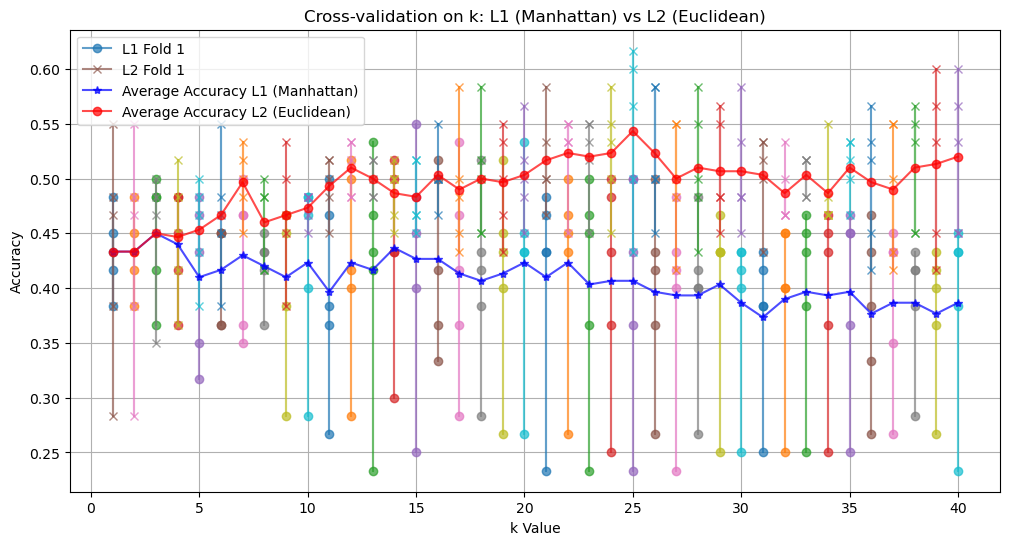

In [40]:
plt.figure(figsize=(12, 6))

# Assuming fold_accuracies_l1 and fold_accuracies_l2 store accuracies for L1 and L2 distances respectively
# And avg_accuracies_l1 and avg_accuracies_l2 store the average accuracies for L1 and L2 distances

colors = plt.cm.tab10.colors

# Loop to plot individual fold accuracies for both L1 (Manhattan) and L2 (Euclidean)
for k in range(40):
    # Plot L1 (Manhattan) fold accuracies
    fold_accuracy_l1 = fold_accuracies_1[k]
    plt.plot([k + 1] * len(fold_accuracy_l1), fold_accuracy_l1, linestyle='-', marker='o', alpha=0.7, color=colors[k % len(colors)], label=f'L1 Fold {k+1}' if k == 0 else "")

    # Plot L2 (Euclidean) fold accuracies
    fold_accuracy_l2 = fold_accuracies_2[k]
    plt.plot([k + 1] * len(fold_accuracy_l2), fold_accuracy_l2, linestyle='-', marker='x', alpha=0.7, color=colors[(k+5) % len(colors)], label=f'L2 Fold {k+1}' if k == 0 else "")

# Plot average accuracies for L1 and L2 distances
plt.plot(range(1, 41), avg_accuracies_1, color='blue', alpha=0.7, label='Average Accuracy L1 (Manhattan)', linestyle='-', marker='*')
plt.plot(range(1, 41), avg_accuracies_2, color='red', alpha=0.7, label='Average Accuracy L2 (Euclidean)', linestyle='-', marker='o')

# Labels and title
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Cross-validation on k: L1 (Manhattan) vs L2 (Euclidean)')

# Show grid and legend
plt.grid(True)
plt.legend()

# Display the plot
plt.show()


Varying Performance:
Both L1 (Manhattan) and L2 (Euclidean) show fluctuating accuracy across different k values, especially at lower k (5–15). This suggests sensitivity to local patterns and outliers. L1 handles noise better, while L2 is more affected by feature scale and outliers if data isn't normalized.

Optimal k Values:
The best accuracy for both metrics is seen around k = 10–15, where the model balances bias and variance. L1 performs slightly better in this range, while L2 catches up as k increases but shows diminishing gains beyond k = 25.

Model Stability:
L1 shows more stable accuracy across k, with smoother trends and fewer sudden drops. L2 is less stable at low k, showing more erratic changes in performance, which reflects higher sensitivity to small variations in the data.

Variation Across 5 Folds:
L1 has smaller variation across folds, especially in the optimal k range, indicating consistent performance across different splits. L2 shows higher variance, especially at lower k, making its results less predictable.

Selecting the Proper Distance Measure:
L1 is more robust for this dataset, performing better in the key k range and showing greater stability. L2 may improve if the data is normalized, but it’s more sensitive to noise and split variability.

Final Recommendation:
Using L1 (Manhattan) with k = 10–15 for the best mix of accuracy and stability. Consider L2 only if the data is properly scaled and the feature space supports Euclidean assumptions.